### Cleaning Indeed Reviews Data

The goal from this dataset is to figure out:
- How different industries affect the work quality
- How different ranks affect the work quality
- How different occupations affect the work quality

### Basic Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [27]:
review_data = pd.read_excel('Datasets/webscraping_indeed_unique_reviews_24112020.xlsx');

review_data.head(3)

,_OccupationRole,_Rank,Author,Company,Date,Employment,Occupation,Place,Review Raw,Review Removed Punctuation,Review Stopwords Removed,ReviewStopwordsRemoved2,Table Name,Rating
0,Sales,NaN,Retail Assistant (Former Employee) - City Hall...,Charles-&-Keith,2019-11-23,Former Employee,Retail Assistant,City Hall,Eazy cash for student who want to earn extra p...,Eazy cash for student who want to earn extra p...,"['eazy', 'cash', 'student', 'want', 'earn', 'e...",eazy cash student want earn extra pocket money...,webscraping_indeed_reviews_Charles-&-Keith2411...,3
1,NaN,NaN,Fashion Advisor (Former Employee) - Jurong poi...,Charles-&-Keith,2020-07-07,Former Employee,Fashion Advisor,Jurong point,Working in Charles and Keith is definitely a g...,Working in Charles and Keith is definitely a g...,"['working', 'charles', 'keith', 'definitely', ...",working charles keith definitely good opportun...,webscraping_indeed_reviews_Charles-&-Keith2411...,5
2,NaN,Manager,Boutique Manager (Current Employee) - Singapor...,Charles-&-Keith,2020-04-01,Current Employee,Boutique Manager,Singapore,Charles and Keith is a well known local brand ...,Charles and Keith is a well known local brand ...,"['charles', 'keith', 'well', 'known', 'local',...",charles keith well known local brand singapore...,webscraping_indeed_reviews_Charles-&-Keith2411...,3


---

We have the following features

ReviewStopwordsRemoved:
  - This can help us figure out type of benefits
  
Rank:
  - Position of the person

Occupation:
  - What jobs they do. This can help us get the industry
 
OccupationRole:
  - Effectively just what department they work at (e.g. a Lawyer in OCBC will still fall under law occupation Role)


---

In [28]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   _OccupationRole             1870 non-null   object        
 1   _Rank                       956 non-null    object        
 2   Author                      3315 non-null   object        
 3   Company                     3315 non-null   object        
 4   Date                        3315 non-null   datetime64[ns]
 5   Employment                  3315 non-null   object        
 6   Occupation                  3305 non-null   object        
 7   Place                       3312 non-null   object        
 8   Review Raw                  3314 non-null   object        
 9   Review Removed Punctuation  3315 non-null   object        
 10  Review Stopwords Removed    3149 non-null   object        
 11  ReviewStopwordsRemoved2     3066 non-null   object      

In [29]:
# Dropping rows and columns
review_data.drop(columns=['Table Name'] , inplace=True)

### Industry and Occupation

In [30]:
print(review_data['Company'].unique())
print(review_data['Occupation'].unique())
review_data[['Occupation' , 'Company']]

## There are only 10 unique companies, i can just manually label each based on their industry
## There is alot of occupation 

['Charles-&-Keith' 'Dbs-Bank' 'Giordano' 'Isetann-Department-Store'
 'M1-Limited' 'Ocbc-Bank' 'Singtel' 'Uniqlo' 'United-Overseas-Bank'
 'Starhub']
['Retail Assistant' 'Fashion Advisor' 'Boutique Manager' ...
 'Part Time Bank Teller' 'contract staff' 'Senior Loans Manager']


,Occupation,Company
0,Retail Assistant,Charles-&-Keith
1,Fashion Advisor,Charles-&-Keith
2,Boutique Manager,Charles-&-Keith
3,Retail Assistant,Charles-&-Keith
4,Sales Associate,Charles-&-Keith
...,...,...
3310,Senior officer,United-Overseas-Bank
3311,Supervisor,United-Overseas-Bank
3312,Associate Officer,United-Overseas-Bank
3313,contract staff,United-Overseas-Bank


In [31]:
## handling industry (easy)
company_to_industry_map = {
  'Charles-&-Keith': 'Fashion Retail',
  'Dbs-Bank': 'Banking & Finance',
  'Giordano': 'Apparel Retail',
  'Isetann-Department-Store': 'General Retail',
  'M1-Limited': 'Telecommunications',
  'Ocbc-Bank': 'Banking & Finance',
  'Singtel': 'Telecommunications',
  'Uniqlo': 'Fashion Retail',
  'United-Overseas-Bank': 'Banking & Finance',
  'Starhub': 'Telecommunications',
}

def createIndustry(company_name):
  global company_to_industry_map
  return company_to_industry_map[company_name]


review_data['Industry'] = review_data['Company'].apply(createIndustry)

review_data['Industry']

0          Fashion Retail
1          Fashion Retail
2          Fashion Retail
3          Fashion Retail
4          Fashion Retail
              ...        
3310    Banking & Finance
3311    Banking & Finance
3312    Banking & Finance
3313    Banking & Finance
3314    Banking & Finance
Name: Industry, Length: 3315, dtype: object

### Extracting Benefits

### Plottings

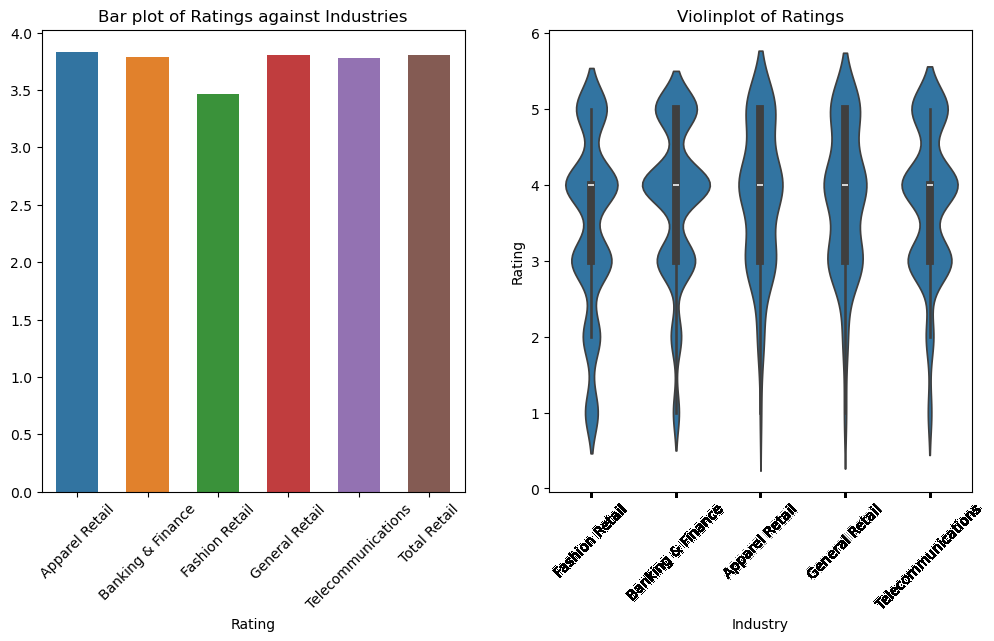

,Rating
Industry,
Apparel Retail,3.833333
Banking & Finance,3.787037
Fashion Retail,3.463832
General Retail,3.805556
Telecommunications,3.775161
Total Retail,3.805556


In [63]:
grouped_by_industry = review_data[['Industry' , 'Rating']].groupby(by='Industry').mean()

# I also want to 'group' the retails tgt
mean_retail_rating = grouped_by_industry.loc[['General Retail' , 'Apparel Retail' ,'Fashion Retail'] , :].median()

# adding to the df
grouped_by_industry.loc['Total Retail'] = mean_retail_rating

# Plottings
X = grouped_by_industry.index
y = grouped_by_industry['Rating'].values

fig , axes = plt.subplots(1 , 2 ,figsize=(12 , 6))

# Bar plot
sns.barplot(x=X , y=y , hue=X , width=0.6 , ax=axes[0])
axes[0].set_xticks(ticks=X , labels=X , rotation=45)
axes[0].set_xlabel('Rating')
axes[0].set_title('Bar plot of Ratings against Industries')


# Box plot
X = review_data['Industry']
sns.violinplot(x=X , y=review_data['Rating'] , ax=axes[1])
axes[1].set_xticks(ticks=X, labels=X , rotation=45)
axes[1].set_title('Violinplot of Ratings')

plt.show()

grouped_by_industry